In [1]:
from autoencoder import *

# Сколько видеопамяти занимает модель

In [2]:
import torch

print(f"До загрузки:")
print(f"\tЗанято VRAM: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
print(f"\tРезервировано VRAM: {torch.cuda.memory_reserved() / 1024**2:.2f} MB")

model, _ = model_loader()
model.eval()
model.to('cuda')

print(f"После загрузки:")
print(f"\tЗанято VRAM: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
print(f"\tРезервировано VRAM: {torch.cuda.memory_reserved() / 1024**2:.2f} MB")

До загрузки:
	Занято VRAM: 0.00 MB
	Резервировано VRAM: 0.00 MB
Загружена последняя модель: model.pt
После загрузки:
	Занято VRAM: 1105.44 MB
	Резервировано VRAM: 1110.00 MB


# Потери на проверочной выборке

In [2]:
dataset = ClagnoscoDataset()
transformed_dataset = TransformedClagnoscoDataset(dataset)

train_batches, test_batches = dataset.random_splitting_batching_buckets(batch_size=-1, seed=42)

model, _ = model_loader()

Загружена последняя модель: model.pt


In [3]:
avg_loss, losses = test_model(model, test_batches, transformed_dataset)

Проверка модели:   0%|          | 0/42833 [00:00<?, ?it/s]

Средняя ошибка: 0.029896


# Демонстрация на картинках

In [2]:
# url = "https://huggingface.co/pogorzelskich/clagnosco_2025-05-11/resolve/main/model.pt?download=true"
# model, _ = model_loader(url)
model, _ = model_loader("autoencoder_2025-06-13_01-33-18_epoch_10.pt")
model.eval()
print("Модель загружена из Hugging Face")

Загружена выбранная модель: autoencoder_2025-06-13_01-33-18_epoch_10.pt
Модель загружена из Hugging Face


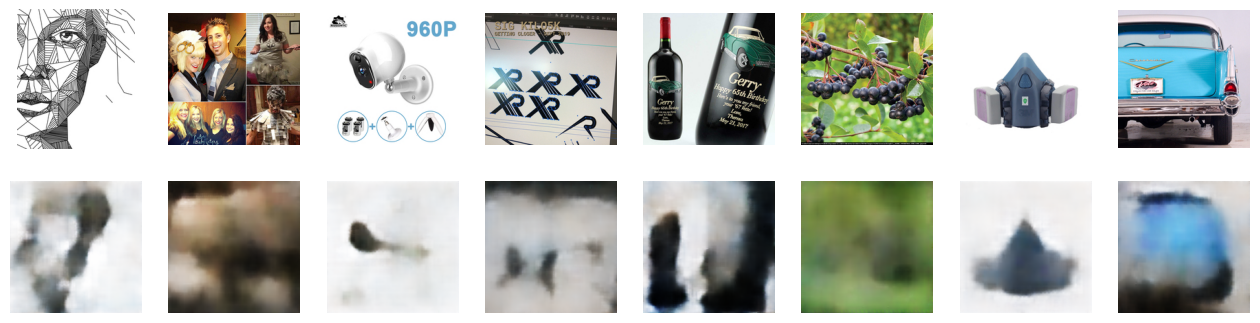

In [3]:
# Демнострация работы автоэнкодера на картинках
import matplotlib.pyplot as plt

dataset = ClagnoscoDataset()
transformed_dataset = TransformedClagnoscoDataset(dataset)
train_batches, test_batches = dataset.random_splitting_batching_buckets(batch_size=-1, seed=42) #seed=430
test_list = batch_buckets_to_list(test_batches)

start_img = 55
img_count = 8

images_origin = []
for i in range(start_img, img_count+start_img):
    images_origin.append(dataset[test_list[i]]["image"])

images_reconstructed = []
for img in images_origin:
    images_reconstructed.append(run_image_through_autoencoder(model, img)[1])

# PLT Оригиналы и реконструкции
fig, axs = plt.subplots(2, img_count, figsize=(img_count*2, 4))
for i in range(img_count):
    axs[0, i].imshow(images_origin[i], cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(images_reconstructed[i], cmap='gray')
    axs[1, i].axis('off')


In [13]:
sum([len(i[1]) for i in test_batches])

42833

# Тестирование на картинке

In [5]:
model, _ = model_loader("autoencoder_2025-06-12_19-34-07_epoch_1.pt")
model = model.to(DEVICE)
model.eval()
print("Модель загружена")

Загружена выбранная модель: autoencoder_2025-06-12_19-34-07_epoch_1.pt
Модель загружена


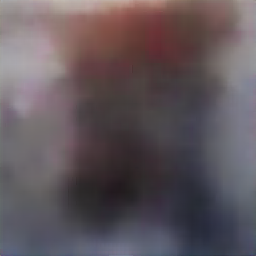

In [4]:
img = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/2-Finnic-branch.png/190px-2-Finnic-branch.png"
img = r"C:\!project-dataset\images_resize\000d10f3c1c08fc3bf7a68322cab7b7f.jpg"
# img = r"C:\!project-dataset\images_resize\00a50fad781d7e2edc57b3780be70e7f.jpg"
# img = r"C:\!project-dataset\images_square\00a50fad781d7e2edc57b3780be70e7f.jpg"
# img = r"C:\!project-dataset\images_resize\00c6a6fa64971a4123306eeb09a1e5a4.jpg"

img = open_image(img)
# latent_vec, embedding_vec, restored_img = run_image_through_autoencoder(model, img)
latent_vec, restored_img = run_image_through_autoencoder(model, img)

restored_img

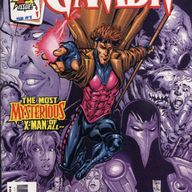

In [5]:
img

In [6]:
# Демонстрация латентного вектора
print(f"Латентный вектор ({latent_vec.shape[0]} признаков):")
for i in range(0, latent_vec.shape[0], 12):
    curr_vec = latent_vec[i:i+12]
    print(*[f"{vec:.2f}" for vec in curr_vec], sep="\t")

Латентный вектор (512 признаков):
7.81	3.47	-6.23	-2.65	0.45	6.60	0.48	-64.53	-6.41	4.48	-35.26	7.85
-11.37	-3.74	0.05	-31.24	5.92	-7.25	-1.12	9.90	-4.45	6.21	-7.11	-1.24
-2.98	0.78	5.45	5.24	-0.09	-6.16	1.78	-1.12	-6.78	-12.56	0.74	-10.65
-17.84	1.82	2.60	-8.52	4.16	-13.99	-0.28	21.53	-1.16	-83.84	21.18	1.66
0.39	-4.53	-14.55	-3.72	-15.20	-4.50	20.18	-9.11	11.85	-5.27	-4.33	7.57
-7.17	18.40	3.12	-12.47	-0.27	-2.42	5.03	34.00	0.38	-5.60	6.90	-10.57
-5.49	8.32	2.85	7.53	1.16	8.22	3.59	-3.96	-2.32	3.13	-2.26	6.19
47.01	-1.33	-9.19	2.08	3.54	-3.82	-0.14	-0.55	0.18	-2.76	-5.95	-12.23
0.61	-154.47	7.70	8.96	-3.40	-0.24	-4.33	5.16	0.66	-1.25	1.97	-4.12
-2.00	2.82	1.10	9.88	-14.53	10.59	-2.83	-5.46	0.65	3.04	-1.56	-5.23
-5.93	-7.82	-6.82	-3.39	-9.24	7.80	2.75	-6.05	-2.23	6.44	3.40	-1.19
5.95	4.03	2.27	-9.11	1.67	-6.78	4.58	4.65	4.91	-4.18	6.72	-1.19
-7.37	2.06	-11.67	5.07	-16.52	8.34	1.96	-4.04	1.59	-3.59	-7.42	-1.82
6.06	-1.81	10.37	-15.42	10.86	7.14	13.16	3.76	-5.74	3.43	3.31	2.68
-0.28	4.8

# КЛАСТЕРИЗАЦИЯ

In [1]:
from autoencoder import images_to_latent, model_loader
import numpy as np

img_dir = r"C:\!project-dataset\z_images_small"
# img_dir = r"C:\!project-dataset\images_resize"
model, _ = model_loader()

images_and_latents, errored_images, success = images_to_latent(img_dir, model=model, cashing=True)
latents = np.stack([i for _, i in images_and_latents])

Загружена последняя модель: autoencoder_2025-05-30_02-34-10_epoch_35.pt


In [ ]:
from cluster import *
images_and_clusters = cluster_latent_vectors(images_and_latents)
print(len(images_and_clusters))
for i in images_and_clusters[0]:
    print(i)

18
('00c93077029372c986fb5678c028fdf9.jpg', 0.8865913493234658, True)
('dc51b23da944689f9a934c6cc1826b46.jpg', 0.8526085828521522, True)
('00c119db210ae222aed80e2c56effe40.jpg', 0.8520870269400684, True)
('db018c40ac028df31f00c1b184aa9140.jpg', 0.8512290110517958, True)
('da8b9d29cfa4fffe3eef15f5d0febfb5.jpg', 0.8499849934425332, True)
('00bba42b5f5abac45b808ef8c1ce2436.jpg', 0.8496811339687036, True)
('db5a811e52d5f83d40100807332d72af.jpg', 0.848814274911828, True)
('dc95ec38cc8468d7f100ead5725fd261.jpg', 0.8476074023722378, True)
('dbb4c8e37f4447f9ee1674f14708d006.jpg', 0.8432434983901006, True)
('dc60f6d3811d710561a7660fde9ee2d1.jpg', 0.8398261322016903, True)
('dbfb04bbdab682fd7d24844ab4a7787c.jpg', 0.8398129168004924, True)
('db0ff9d4fc3907ff6c505092fa6901f1.jpg', 0.8396056294375788, True)
('da393331ab189e9b174537a1208099f1.png', 0.8368150884206245, True)
('db2e3c4226aaa125cac6b746596600b1.jpg', 0.8334014585463982, True)
('da80def866bfe66ddb186d5cdbcb44b7.png', 0.8328122038174467,

# Accuracy

In [1]:
# Модель и датасет
from autoencoder import *

dataset = ClagnoscoDataset()
# transformed_dataset = TransformedClagnoscoDataset(dataset)

train_batches, test_batches = dataset.random_splitting_batching_buckets(batch_size=-1, seed=42)

model, _ = model_loader()

Загружена последняя модель: model.pt


In [2]:
model.eval()

avg_accuracy = test_model_accuracy(model, test_batches, dataset)

Проверка модели: 100%|██████████| 42833/42833 [19:46<00:00, 36.11it/s, acc=0.7521, ср_acc=0.8773]

Accuracy: 0.877300


In [3]:
print("Accuracy:", avg_accuracy)

Accuracy: 0.8773001029117207
